In [3]:

# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/1006/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [4]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 21.8 MB/s 


In [5]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [6]:
# face detection for the Celebrity Faces Dataset
from os import listdir
import os, os.path
import math
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from tensorflow.keras.models import load_model
# develop a classifier for the Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import tensorflow_hub as hub
from tensorflow.keras import models


In [7]:
# load image from file
image = Image.open('/content/drive/MyDrive/Colab Notebooks/1006/celebrity-faces-dataset/train/Angelina_Jolie/Angelina_Jolie_0002.jpg')
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)

2.2.1 big_bbox : To find bigger bounding box as title face for an image having multiple faces.

In [8]:

def big_bbox(data):
    biggest=0
    if data !=[]:
      for faces in data:
        box=faces['box']            
        # calculate the area in the image
        area = box[3]  * box[2]
        if area>biggest:
          biggest=area
          bbox=box
      return bbox
    else:
      return (None)


2.2.2 extract_face : Pipe line containing image preprocessing steps as convert to 'RGB' --> detect faces --> identify bigger bounding box as target face --> extract the face --> crop to required dimension for embedding model.


In [9]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()   
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = big_bbox(results)
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

2.2.3 load_faces : extract faces for images in a folder

In [10]:

# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	# enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
		# store
		faces.append(face)
	return faces


2.2.4 load_dataset : extract faces for images of all the sub-folder in a directory and add label the image as per the sub-folder name

In [11]:

# load a dataset that contains one subdir for each class that in turn contains images
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory + subdir + '/'
		# skip any files that might be in the dir
		if not os.path.isdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)


2.2.5 get_embeddig : using a face embedding model and saved extracted faces the faces are being embedded

In [12]:

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]


2.2.6 load_faces_test : preprocess all the unseen/test images provided in a folder and returns the extracted faces, its embeddings and the name of the file

In [13]:

# load images and extract faces for all images in a directory
def load_faces_test(directory,model):
	faces = list()
	embed = list()
	names = list()
  # enumerate files
	for filename in listdir(directory):
		# path
		path = directory + filename
		# get face
		face = extract_face(path)
    # embed face
		embedding = get_embedding(model,face)
		# store
		faces.append(face)
		embed.append(embedding)
		names.append(filename)
	return faces,embed,names

2.2.7 proba : it will define whether final prediction is being 'Permitted' or 'Restricted' based on class probability threshold

In [14]:
def proba (df):
    if df['Proba'] > 99.999:
        val = df['Name']
    else:
        val = 'Unidentified'
    return val

3.0 Collection & Loading data:

3.1 Import train & validation dataset from G-Drive:

In [ ]:
#!unzip "/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/data_with_own.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/data_with_own.zip, /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/data_with_own.zip.zip or /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/data_with_own.zip.ZIP.


In [ ]:
#!unzip "/content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test.zip, /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test.zip.zip or /content/gdrive/MyDrive/GCDAI_Capstone_CV_Project/test.zip.ZIP.


Data Pre-processing:
4.1 Basic preprocessing: conversion to RGB and extraction of faces


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


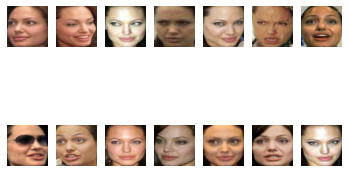

In [15]:
# specify folder to plot
folder = "/content/drive/MyDrive/Colab Notebooks/1006/celebrity-faces-dataset/train/Angelina_Jolie/"
max = len(os.listdir(folder))
m = 7
n = int(math.ceil(max / m))
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
  
  # plot
	pyplot.subplot(n, m, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

4.2 Prepare Train and validation data set

In [16]:
# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/Colab Notebooks/1006/celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/Colab Notebooks/1006/celebrity-faces-dataset/val/')
# save arrays to one file in compressed format
savez_compressed('celebrity-faces-dataset.npz', trainX, trainy, testX, testy)
print(testX.shape, testy.shape)

>loaded 18 examples for class: Atal_Bihari_Vajpayee
>loaded 11 examples for class: Bill_Gates
>loaded 25 examples for class: David_Beckham
>loaded 15 examples for class: Jennifer_Aniston
>loaded 23 examples for class: Bill_Clinton
>loaded 36 examples for class: Arnold_Schwarzenegger
>loaded 14 examples for class: Angelina_Jolie
>loaded 15 examples for class: Jennifer_Lopez
>loaded 36 examples for class: George_W_Bush
>loaded 12 examples for class: Michael_Schumacher
>loaded 17 examples for class: Tiger_Woods
>loaded 18 examples for class: Winona_Ryder
>loaded 0 examples for class: Samta_Sharma
>loaded 38 examples for class: Vladimir_Putin
>loaded 16 examples for class: Naomi_Watts
>loaded 39 examples for class: Serena_Williams
(333, 160, 160, 3) (333,)
>loaded 5 examples for class: Angelina_Jolie
>loaded 5 examples for class: Arnold_Schwarzenegger
>loaded 5 examples for class: Bill_Clinton
>loaded 5 examples for class: Atal_Bihari_Vajpayee
>loaded 5 examples for class: George_W_Bush
>l

Observation:.....
4.3 Create Face Embeddings for Train and validation dataset

In [17]:
# load the face dataset
data = load('celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
model_fcnt = load_model('/content/drive/MyDrive/Colab Notebooks/1006/facenet_keras.h5',custom_objects={'KerasLayer': hub.KerasLayer})
model_fcnt.compile()
print('Loaded Model')
# convert each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model_fcnt, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)
# convert each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model_fcnt, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)
# save arrays to one file in compressed format
savez_compressed('celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)


Loaded:  (333, 160, 160, 3) (333,) (75, 160, 160, 3) (75,)
Loaded Model
(333, 128)
(75, 128)


4.4 Perform Face Classification:

In [18]:
# load dataset
data = load('celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))


Dataset: train=333, test=75


# Next code is to be run seperatly

In [19]:
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model_class = SVC(kernel='linear', probability=True)
model_class.fit(trainX, trainy)
# predict
yhat_train = model_class.predict(trainX)
yhat_test = model_class.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


4.5 Random Checks for dataset:

Predicted: Winona_Ryder (63.935)
Expected: Winona_Ryder


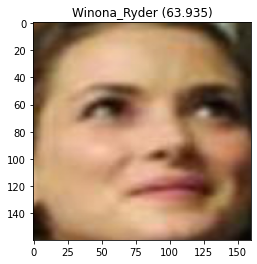

In [20]:
# test model on a random example from the test dataset
data = load('celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
#selection = choice([i for i in range(testX.shape[0])])
selection = 70
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model_class.predict(samples)
yhat_prob = model_class.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

Predicted: Serena_Williams (76.968)
Expected: Serena_Williams


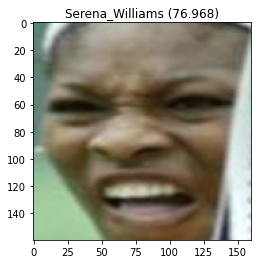

Predicted: Serena_Williams (73.698)
Expected: Serena_Williams


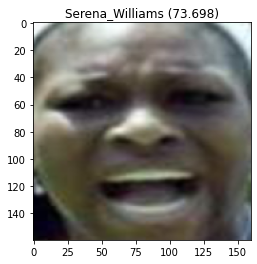

Predicted: Serena_Williams (77.520)
Expected: Serena_Williams


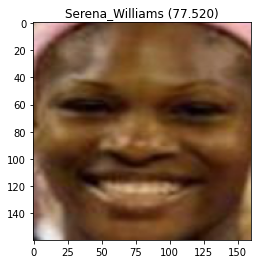

Predicted: Serena_Williams (76.228)
Expected: Serena_Williams


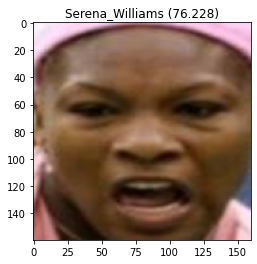

Predicted: Serena_Williams (81.909)
Expected: Serena_Williams


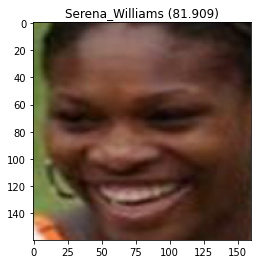

Predicted: Jennifer_Aniston (50.378)
Expected: Jennifer_Aniston


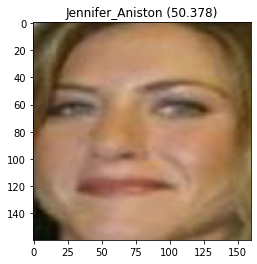

In [21]:
m1 = 40
m2 = 46

# enumerate files
for selection in range(m1,m2,1):
    random_face_pixels = testX_faces[selection]
    random_face_emb = testX[selection]
    random_face_class = testy[selection]
    random_face_name = out_encoder.inverse_transform([random_face_class])
    # prediction for the face
    samples = expand_dims(random_face_emb, axis=0)
    yhat_class = model_class.predict(samples)
    yhat_prob = model_class.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    print('Expected: %s' % random_face_name[0])
    # plot for fun
    pyplot.imshow(random_face_pixels)
    title = '%s (%.3f)' % (predict_names[0], class_probability)
    pyplot.title(title)
    pyplot.show()

Prediction on Unseen data / Test data:
5.1 Preprocessing Pipeline: conversion to RGB, extraction of faces and get embeddings

In [23]:
# load unknown dataset + preprocess + embedding
TestX_faces,TestX_embds,TestX_names = asarray(load_faces_test('/content/drive/MyDrive/Colab Notebooks/1006/celebrity-faces-dataset/test/',model_fcnt))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


5.2 Prediction with probability estimation using trained model

Predicted: Arnold_Schwarzenegger (100.000)


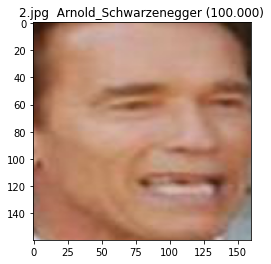

Predicted: Angelina_Jolie (100.000)


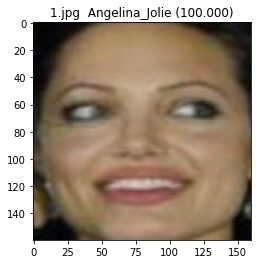

Predicted: Winona_Ryder (97.904)


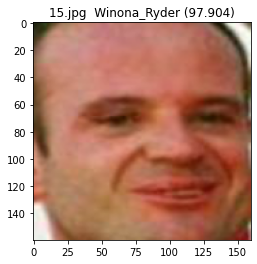

Predicted: Bill_Gates (100.000)


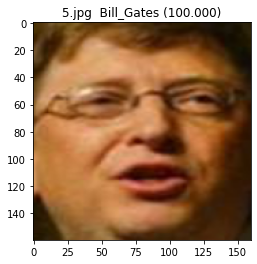

Predicted: George_W_Bush (99.731)


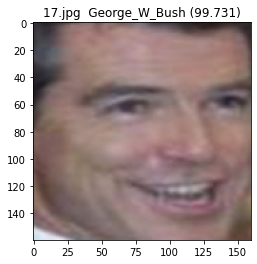

Predicted: Angelina_Jolie (19.598)


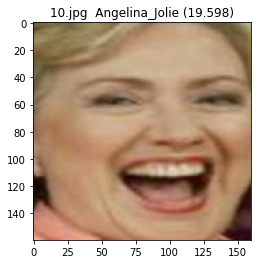

Predicted: George_W_Bush (100.000)


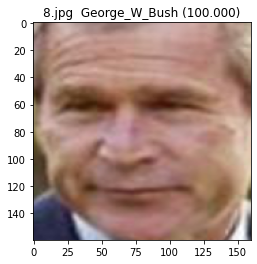

Predicted: Naomi_Watts (100.000)


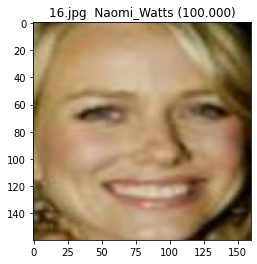

Predicted: Atal_Bihari_Vajpayee (100.000)


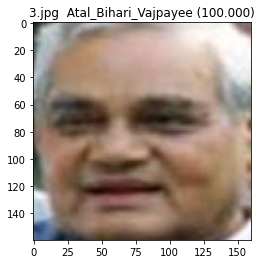

Predicted: Jennifer_Aniston (100.000)


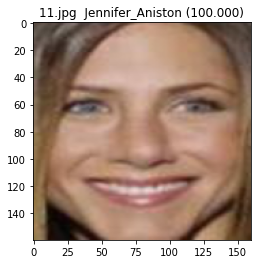

Predicted: Jennifer_Lopez (25.664)


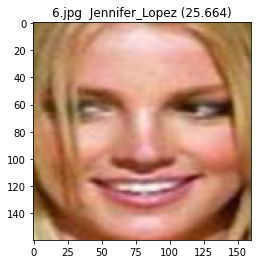

Predicted: Atal_Bihari_Vajpayee (99.984)


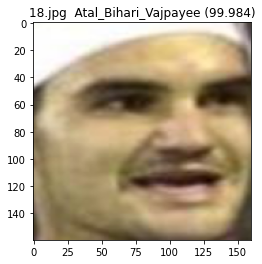

Predicted: Winona_Ryder (100.000)


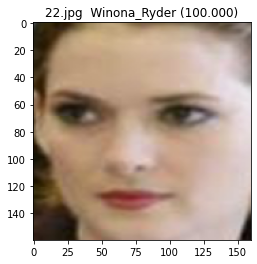

Predicted: Jennifer_Lopez (99.512)


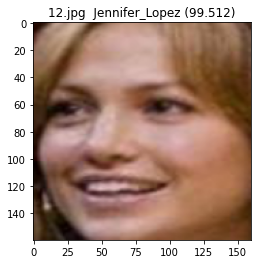

Predicted: Vladimir_Putin (100.000)


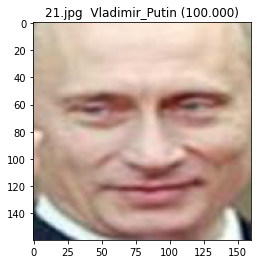

Predicted: Tiger_Woods (100.000)


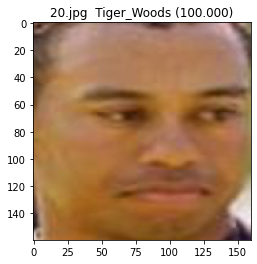

Predicted: David_Beckham (100.000)


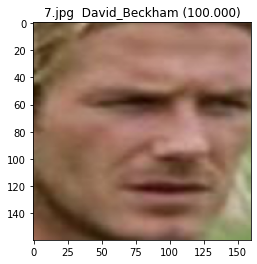

Predicted: Bill_Clinton (100.000)


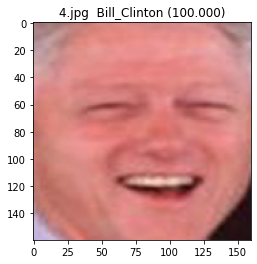

Predicted: Winona_Ryder (77.192)


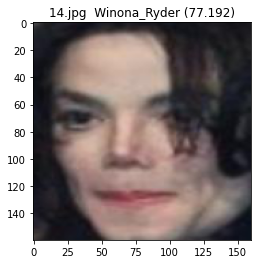

Predicted: Atal_Bihari_Vajpayee (49.502)


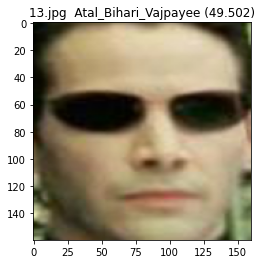

Predicted: George_W_Bush (99.999)


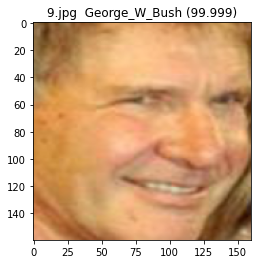

Predicted: Serena_Williams (100.000)


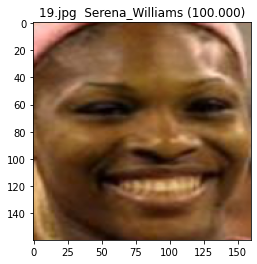

In [24]:
test_data_dict={}
for selection in range(TestX_embds.shape[0]):
    random_face_pixels = TestX_faces[selection]
    random_face_emb = TestX_embds[selection]
    file = TestX_names[selection]
    # prediction for the face
    samples = expand_dims(random_face_emb, axis=0)
    yhat_class = model_class.predict(samples)
    yhat_prob = model_class.predict_proba(samples)
    # get name
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)
    # Creating a dictionary
    test_data_dict[file]=[predict_names,class_probability]
    print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
    #print('Expected: %s' % random_face_name[0])
    # plot for fun
    pyplot.imshow(random_face_pixels)
    title = '%s  %s (%.3f)' % (TestX_names[selection],predict_names[0], class_probability)
    pyplot.title(title)
    pyplot.show()

5.3 Prepare the submission file

In [27]:
import pandas as pd
prediction = pd.DataFrame.from_dict(test_data_dict).T.reset_index()
prediction.columns =['File_Name','Name','Proba']
prediction

,File_Name,Name,Proba
0,2.jpg,[Arnold_Schwarzenegger],100
1,1.jpg,[Angelina_Jolie],100
2,15.jpg,[Winona_Ryder],97.9042
3,5.jpg,[Bill_Gates],100
4,17.jpg,[George_W_Bush],99.7308
5,10.jpg,[Angelina_Jolie],19.5984
6,8.jpg,[George_W_Bush],100
7,16.jpg,[Naomi_Watts],100
8,3.jpg,[Atal_Bihari_Vajpayee],100
9,11.jpg,[Jennifer_Aniston],100


In [28]:
prediction.dtypes
prediction = prediction.astype({"File_Name": str, "Name": str, "Proba": float})
prediction.dtypes

File_Name     object
Name          object
Proba        float64
dtype: object

In [29]:
prediction['File_Name'] = prediction['File_Name'].apply(lambda x: x.replace('.jpg',''))
prediction['Name'] = prediction['Name'].apply(lambda x: x.replace('[',"").replace(']',"")).str.strip(" ' ' ")
prediction['Prediction'] = prediction.apply(proba, axis =1)
prediction.drop(['Name', 'Proba'], axis =1, inplace=True)


In [30]:
prediction = prediction.astype({"File_Name": int, "Prediction": str})

In [31]:
prediction.sort_values(by=['File_Name'], ascending=True, inplace = True)
prediction

,File_Name,Prediction
1,1,Angelina_Jolie
0,2,Arnold_Schwarzenegger
8,3,Atal_Bihari_Vajpayee
17,4,Bill_Clinton
3,5,Bill_Gates
10,6,Unidentified
16,7,David_Beckham
6,8,George_W_Bush
20,9,Unidentified
5,10,Unidentified


In [32]:
prediction.to_csv('test_predictions.csv',index = False, header= False)

In [33]:
from google.colab import files
files.download("test_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6. Conclusion:
Model for face recognition for authorize personnel has been built well with their images.

The basic preprocessing steps like color channel conversion to RGB followed by MTCNN techniques have been adopted in order to extract faces.

Pre-trained Facenet model used for Face Embedding.

Support Vector classifier (linear) seems to be performed well.

The model can be deployed to the company server and is used to grant access to personnel to enter or exit the company premises.

A photo is captured of each arriving personnel using a live-cam and is analyzed by the model.

If the model recognizes the person, they are Permitted access to enter the premises. Else, the entry is Restricted until any human interference.


7. Actionable Insights:
The model unable to identify two images in the test dataset, which are actually present during training and the reason can be attributed as age of the person in the image. One with younger age and other with elder age of the person in the images are unable to identify by the model.

The model is to be retrained from time to time to account for the changes to people’s faces due to aging, and whenever new personnel joins the company.


8. Limitation of the study:
The study has been carried out over some of the celebrity dataset and some of the pre-trained models for image. Hence, with other available models and dataset the model performance might be different.
